## Parte III: Entrenamiento de un modelo

Autores: Jordi Bolibar & Facundo Sapienza  
Traducción: Eduardo Villavicencio

En este cuaderno, nos centraremos en cómo entrenar diferentes modelos de aprendizaje automático con el conjunto de datos que hemos preparado. Por ahora, olvidaremos la validación cruzada y la prueba, y nos enfocaremos solo en las especificidades de cada método para familiarizarnos con los enfoques clásicos del aprendizaje automático.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 3.1 Configuración
En este punto, `df_all` contiene todos los datos que necesitaremos para entrenar, validar y probar el modelo. Sin embargo, antes de avanzar hacia el entrenamiento de un modelo de aprendizaje automático con estos datos, necesitamos separar una parte del conjunto de datos para probar el modelo y asegurarnos de que no estamos sobreajustando el modelo.

Para realizar las pruebas, podemos usar diferentes estrategias:

1. Separar todos los datos para un conjunto dado de glaciares y usar el resto para entrenamiento/validación.
1. Separar todos los datos de un conjunto dado de glaciares en un período (2010-2020) y usar el resto para entrenamiento/validación.
1. Separar todos los datos de un conjunto dado de glaciares en el período 2010-2020 y usar todas las mediciones para el resto de los glaciares y el otro período 2000-2010 para entrenamiento/validación.
Siguiendo el razonamiento del cuaderno anterior, dado que este conjunto de datos es muy rico en la dimensión *espacial*, vamos a dividirlo en esa dimensión en lugar de la *temporal*. Al hacerlo, intentaremos predecir los cambios en glaciares de Low Latitudes para los cuales no hemos "visto" ninguna observación.

Leemos el conjunto de datos almacenado previamente con la matriz de características y los datos objetivo.

In [3]:
df_all = pd.read_csv('Data/df_all.csv', index_col=['rgi_id', 'period'])
df_all

PDD   area  icecap        lat      lon  \
rgi_id         period                                                     
RGI60-16.00001 2000-2010  149.908305  0.098     0.0 -16.521200 -69.9053   
               2010-2020  164.814093  0.098     0.0 -16.521200 -69.9053   
RGI60-16.00002 2000-2010  152.505705  0.147     0.0 -16.519600 -69.9117   
               2010-2020  167.622093  0.147     0.0 -16.519600 -69.9117   
RGI60-16.00003 2000-2010  149.708505  0.149     0.0 -16.515600 -69.9246   
...                              ...    ...     ...        ...      ...   
RGI60-16.02943 2010-2020  280.516067  0.243     0.0  -0.670835 -78.4414   
RGI60-16.02944 2000-2010  237.544861  9.337     0.0  -0.687720 -78.4280   
               2010-2020  262.516067  9.337     0.0  -0.687720 -78.4280   
RGI60-16.02945 2000-2010  251.064661  2.526     0.0  -0.680813 -78.4491   
               2010-2020  277.132067  2.526     0.0  -0.680813 -78.4491   

                             prcp_01     prcp_02    prcp_03    prcp_04  \
rgi_id         period                                                    
RGI60-16.00001 2000-2010   50.489275   24.571831  11.996828   7.588824   
               2010-2020   38.346242    7.415554   2.732892   7.648336   
RGI60-16.00002 2000-2010   50.489275   24.571831  11.996828   7.588824   
               2010-2020   38.346242    7.415554   2.732892   7.648336   
RGI60-16.00003 2000-2010   50.489275   24.571831  11.996828   7.588824   
...                              ...         ...        ...        ...   
RGI60-16.02943 2010-2020  149.396686  104.373531  48.811930  36.381148   
RGI60-16.02944 2000-2010  159.618200  114.907721  72.589369  28.897996   
               2010-2020  149.396686  104.373531  48.811930  36.381148   
RGI60-16.02945 2000-2010  159.618200  114.907721  72.589369  28.897996   
               2010-2020  149.396686  104.373531  48.811930  36.381148   

                            prcp_05  ...    temp_09    temp_10    temp_11  \
rgi_id         period                ...                                    
RGI60-16.00001 2000-2010  10.724386  ...   9.855564   9.655572  10.099982   
               2010-2020   5.263834  ...   9.910016   9.630017  10.270017   
RGI60-16.00002 2000-2010  10.724386  ...   9.855564   9.655572  10.099982   
               2010-2020   5.263834  ...   9.910016   9.630017  10.270017   
RGI60-16.00003 2000-2010  10.724386  ...   9.855564   9.655572  10.099982   
...                             ...  ...        ...        ...        ...   
RGI60-16.02943 2010-2020  28.175155  ...  10.749991  11.070001  10.910007   
RGI60-16.02944 2000-2010  29.671228  ...  10.511115  10.833343  10.800008   
               2010-2020  28.175155  ...  10.749991  11.070001  10.910007   
RGI60-16.02945 2000-2010  29.671228  ...  10.511115  10.833343  10.800008   
               2010-2020  28.175155  ...  10.749991  11.070001  10.910007   

                            temp_12    zmax    zmed    zmin  dmdtda  \
rgi_id         period                                                 
RGI60-16.00001 2000-2010   9.177782  5041.0  4966.0  4896.0 -0.0546   
               2010-2020   9.399997  5041.0  4966.0  4896.0 -0.3365   
RGI60-16.00002 2000-2010   9.177782  5056.0  5005.0  4963.0 -0.1198   
               2010-2020   9.399997  5056.0  5005.0  4963.0 -0.1276   
RGI60-16.00003 2000-2010   9.177782  5043.0  4963.0  4892.0  0.0703   
...                             ...     ...     ...     ...     ...   
RGI60-16.02943 2010-2020  10.800009  5580.0  5330.0  5103.0 -0.3811   
RGI60-16.02944 2000-2010  10.566650  5864.0  5080.0  4536.0 -0.0460   
               2010-2020  10.800009  5864.0  5080.0  4536.0 -0.3021   
RGI60-16.02945 2000-2010  10.566650  5863.0  5283.0  4806.0 -0.4199   
               2010-2020  10.800009  5863.0  5283.0  4806.0 -0.3943   

                          err_dmdtda  target_id  
rgi_id         period                            
RGI60-16.00001 2000-2010      0.4090        0.0  
               201

### Separación en entrenamiento y prueba

Ahora necesitamos dividir nuestro conjunto de datos en entrenamiento y prueba. Vamos a reservar el 70% de los glaciares para el entrenamiento y el 30% para la prueba. Es muy importante NO utilizar el conjunto de datos de prueba hasta el final de nuestro entrenamiento, una vez que estemos seguros de haber encontrado los mejores hiperparámetros para nuestro modelo.

In [4]:
# Get an array of all unique RGI-ids in the dataset
glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

# Split the dataset into training and test datasets by splitting randomly on RGI-id, such that each glacier 
# is either in the training dataset or in the test dataset
glacier_train, glacier_test = train_test_split(glaciers_ids_all, 
                                               train_size=0.3,
                                               test_size=0.7)

df_train_all = df_all.loc[glacier_train]
df_test = df_all.loc[glacier_test]
df_train_all.shape, df_test.shape

((1762, 38), (4116, 38))

Guardamos el conjunto de datos de prueba en un archivo para dejarlo apartado.

In [5]:
df_test.to_csv('Data/df_test.csv')

### Separación en validación y entrenamiento

Ahora vamos a entrenar los modelos basados en el conjunto de datos de entrenamiento, que deberá ser dividido nuevamente en entrenamiento y validación. Como recordatorio, el conjunto de datos de entrenamiento se proporcionará a los modelos de aprendizaje automático para ajustar los datos, mientras que el conjunto de validación se reservará para ajustar los hiperparámetros del modelo, de manera que se ajusten mejor al conjunto de validación fuera de muestra. Esto se hace para evitar el sobreajuste y seleccionar un conjunto de hiperparámetros que generalicen mejor los datos no vistos.

Una forma simple y directa de hacer esto es dividir el conjunto de entrenamiento en un 80% para entrenamiento y un 20% para validación. Ten en cuenta que aquí el nuevo conjunto de datos de entrenamiento es solo un subconjunto del anterior conjunto de entrenamiento. A partir del conjunto de datos original, hemos hecho la siguiente división:

Conjunto de datos completo:
* Conjunto de prueba -> reservado
* Conjunto de entrenamiento -> dividido en entrenamiento/validación
    * Conjunto de validación -> usado para la selección de hiperparámetros
    * Conjunto de entrenamiento -> conjunto de datos de entrenamiento real que se alimenta a los diferentes modelos de aprendizaje automático

Por ahora, simplemente dividiremos el conjunto de datos en un 80% para entrenamiento y un 20% para validación, utilizando el mismo principio que antes.

In [6]:
glaciers_ids = np.unique(df_train_all.index.get_level_values(0).values)

train_dataset, validation_dataset = train_test_split(glaciers_ids, 
                                               train_size=0.8,
                                               test_size=0.2)

df_train = df_all.loc[train_dataset]
df_validation = df_all.loc[validation_dataset]
df_train.shape, df_validation.shape

((1408, 38), (354, 38))

Y ahora necesitamos separar la matriz de características ($X$) de los datos objetivo ($Y$), ya que deben ser alimentados por separado a los modelos. Esto nos dará 4 conjuntos de datos diferentes:
- Conjuntos de datos de entrenamiento:
    - `X_train`
    - `y_train`
- Conjuntos de datos de validación:
    - `X_validation`
    - `y_validation`

In [7]:
# Drop data that will not be used as features in our model
features_to_drop = ['dmdtda', 'err_dmdtda', 'target_id']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['dmdtda']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for validation set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['dmdtda']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [8]:
df_train_X

PDD   area  icecap        lat      lon  \
rgi_id         period                                                     
RGI60-16.00174 2000-2010   90.131242  0.011     0.0 -15.357000 -70.7301   
               2010-2020   99.964043  0.011     0.0 -15.357000 -70.7301   
RGI60-16.02616 2000-2010   89.720503  0.132     0.0 -11.910800 -76.0594   
               2010-2020   99.188096  0.132     0.0 -11.910800 -76.0594   
RGI60-16.01826 2000-2010  133.974496  0.045     0.0 -10.365100 -76.8658   
...                              ...    ...     ...        ...      ...   
RGI60-16.02060 2010-2020  160.602044  2.202     0.0  -9.783660 -77.2473   
RGI60-16.01345 2000-2010  281.689897  9.335     0.0   0.012949 -77.9930   
               2010-2020  311.416092  9.335     0.0   0.012949 -77.9930   
RGI60-16.01347 2000-2010  411.574117  2.223     0.0   2.931580 -76.0335   
               2010-2020  452.660060  2.223     0.0   2.931580 -76.0335   

                             prcp_01     prcp_02     prcp_03    prcp_04  \
rgi_id         period                                                     
RGI60-16.00174 2000-2010   48.843624   20.990070   16.708393   3.951901   
               2010-2020   35.533354    3.831276    1.531556   4.976042   
RGI60-16.02616 2000-2010   36.755554   19.961957    3.234126   8.171878   
               2010-2020   51.177206    5.490804    4.424881   5.169542   
RGI60-16.01826 2000-2010   78.023181   43.541732   26.087366  13.043869   
...                              ...         ...         ...        ...   
RGI60-16.02060 2010-2020   56.296414   37.547615    7.218699   3.341154   
RGI60-16.01345 2000-2010  141.761294   95.836206   57.502826  18.164152   
               2010-2020  126.058401   93.362882   38.209776  28.758233   
RGI60-16.01347 2000-2010  192.234105  178.294454  110.420817  72.744504   
               2010-2020  227.280407  183.264388   80.175096  72.272078   

                            prcp_05  ...    temp_06    temp_07    temp_08  \
rgi_id         period                ...                                    
RGI60-16.00174 2000-2010   4.605884  ...   3.277791   4.855570   5.499993   
               2010-2020   1.581120  ...   3.680017   5.090018   5.600006   
RGI60-16.02616 2000-2010  11.344413  ...   2.133345   2.988902   3.144440   
               2010-2020  10.124820  ...   2.440018   3.120001   3.239999   
RGI60-16.01826 2000-2010   2.670949  ...   5.177785   6.033352   5.966671   
...                             ...  ...        ...        ...        ...   
RGI60-16.02060 2010-2020   5.316109  ...   7.099991   7.760010   7.559991   
RGI60-16.01345 2000-2010  13.142272  ...  13.333337  13.533356  13.322249   
               2010-2020  20.137407  ...  14.150015  14.020023  13.830008   
RGI60-16.01347 2000-2010  60.863690  ...  18.922228  18.744446  18.477800   
               2010-2020  55.069460  ...  19.780008  19.280002  19.130014   

                            temp_09    temp_10    temp_11    temp_12    zmax  \
rgi_id         period                                                          
RGI60-16.00174 2000-2010   5.988892   6.155558   6.333343   5.900001  5081.0   
               2010-2020   5.990012   6.120001   6.469998   6.130008  5081.0   
RGI60-16.02616 2000-2010   3.222229   3.722243   3.700022   3.566664  5400.0   
               2010-2020   3.210004   3.700006   3.690012   3.390024  5400.0   
RGI60-16.01826 2000-2010   5.888889   6.177761   6.088891   6.011139  5278.0   
...                             ...        ...        ...        ...     ...   
RGI60-16.02060 2010-2020   7.210019   7.570010   7.370007   7.260004  5580.0   
RGI60-16.01345 2000-2010  13.355567  13.577793  13.666663  13.511105  5774.0   
               2010-2020  13.750003  13.900003  13.840009  13.849985  5774.0   
RGI60-16.01347 2000-2010  18.766662  18.800022  19.088898  18.977776  5372.0   
               2010-2020  19.280017  19.399985  19.539999  19.500009  5372.0   

                            zmed    zm

## 3.2 Entrenamiento de un modelo
El paquete sklearn incluye múltiples modelos de regresión que podemos probar en el conjunto de datos. Una de las ventajas de usar sklearn es que la sintaxis y la lógica se comparten entre diferentes algoritmos, lo que facilita probar y comparar distintos modelos. La [documentación de sklearn](https://scikit-learn.org/stable/auto_examples/index.html#examples) incluye varios de estos ejemplos que vale la pena explorar.

Algunos métodos de regresión para explorar incluyen:

1. Enfoques clásicos de regresión continua: regresión lineal, regresión logística, máquinas de soporte vectorial.
1. Regresión basada en árboles: árboles de decisión, bosque aleatorio, métodos de conjunto basados en boosting.
1. Redes neuronales.

La siguiente función de gráfico será útil para reportar el rendimiento de los diferentes modelos.

In [9]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -2.5
    lineEnd = 1.5
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### 3.2.1. Linear Regression

La regresión lineal es el tipo más básico de regresión que podemos usar en nuestro conjunto de datos. Por lo tanto, representa el modelo base con el cual comparar el resto. En esta sección, utilizaremos ElasticNet, una regresión lineal con términos de regularización combinados $L_1$ y $L_2$.

```{note}
Si deseas comprender mejor la regresión lineal y la regularización, te recomendamos encarecidamente que consultes [este excelente cuaderno](https://machine-learning-in-glaciology-workshop.github.io/Lecture-materials/Stats/linear_regression.html) que Ellie Abrahams preparó para este taller.
```

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

Para la regresión lineal y muchos otros métodos, escalaremos los datos para que tengan media cero y varianza unitaria.

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

ElasticNet es un modelo de regresión lineal que incluye el estimador clásico de mínimos cuadrados ordinarios (`alpha=0.0`), Lasso (`l1_ratio=1`) y regresión Ridge (`l1_ratio=0`) en un solo método.

Aquí, vamos a ajustar un modelo `ElasticNet` a nuestro conjunto de datos de entrenamiento, con los siguientes hiperparámetros.

In [13]:
%time
reg_linear = ElasticNet(alpha=0.001,
                        l1_ratio=0.8,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


e:\Proyecto_2024\INAIGEM\volumen_laguna\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.833e-01, tolerance: 2.627e-02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=666)

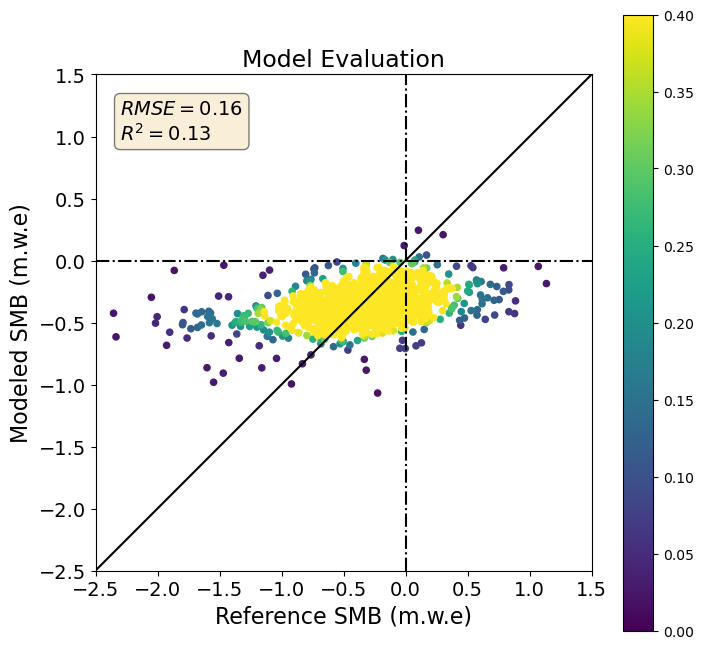

In [14]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), n_toplot=5000)

Podemos ver que el rendimiento no es excelente, ya que no hemos realizado ninguna afinación y selección de hiperparámetros. Dejaré eso para el siguiente cuaderno, y aquí nos centraremos en tener una visión general de todos los métodos y sus hiperparámetros particulares.

### 3.2.2. Regresión con Árbol de Decisión

Los árboles de decisión son métodos de aprendizaje supervisado no paramétricos. El objetivo de este método es generar un modelo que prediga el valor de una variable objetivo aprendiendo reglas de decisión simples inferidas de las características de los datos. Un árbol puede verse como una aproximación constante por tramos.

Para más detalles, puedes consultar la [documentación de `sklearn`](https://scikit-learn.org/stable/modules/tree.html#tree). 

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Por ahora, solo rellenaremos algunos de los hiperparámetros para ver cómo se comporta.

In [16]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=5, 
                                 min_samples_split=5)
reg_tree.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 85.7 ms


DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=0)

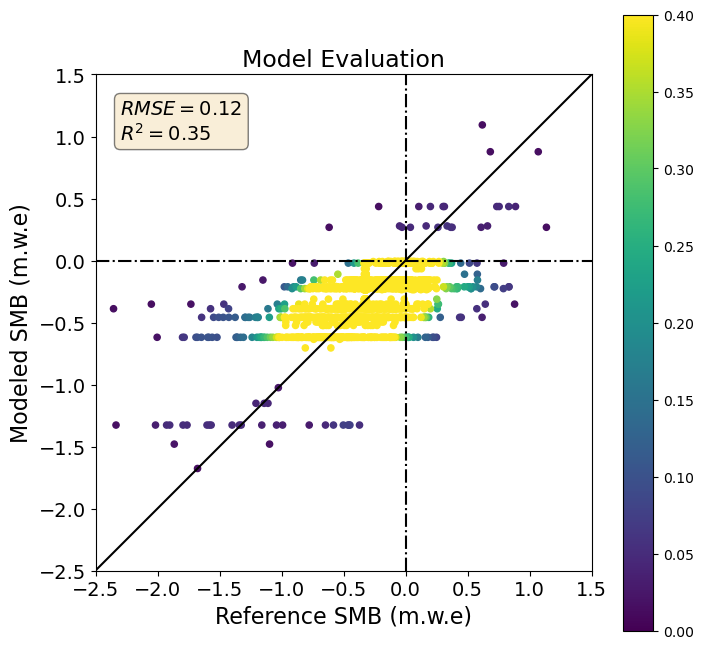

In [17]:
plot_prediction(y_train, reg_tree.predict(X_train), n_toplot=5000)

Nuevamente, podemos ver que el rendimiento no es bueno en absoluto, ya que aún necesitamos realizar una búsqueda adecuada de hiperparámetros.

### 3.2.3. Ensamble de árboles

Podemos probar ejemplos de modelos que combinan aprendices lentos. Estos modelos tienden a funcionar muy bien y ser bastante generales. Sin embargo, ajustar los diferentes hiperparámetros del modelo puede ser complicado y será algo que exploraremos en detalle en el siguiente cuaderno.

Estos métodos son [particularmente poderosos para datos tabulares](https://arxiv.org/abs/2207.08815), el tipo exacto de datos que tenemos aquí en este proyecto. Utilizaremos dos de los mejores métodos de ensamble de árboles: Bosque Aleatorio y Gradient Boosting. Aquí puedes encontrar un ejemplo basado en [regresión por Gradient Boosting](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py).

In [18]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

Como puedes ver, aquí comenzamos a tener una mayor cantidad de hiperparámetros. Por lo tanto, realizar una buena selección de hiperparámetros será crucial para que estos métodos ajusten correctamente los datos en la validación.

In [19]:
#model = 'random forest'
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.1,
        "loss": 'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 300,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "absolute_error",
        'max_features': 10,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [20]:
%%time
reg_ensemble.fit(X_train, y_train)

e:\Proyecto_2024\INAIGEM\volumen_laguna\.conda\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


CPU times: total: 2.33 s
Wall time: 3.44 s


GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_split=5,
                          n_estimators=300, validation_fraction=0.2)

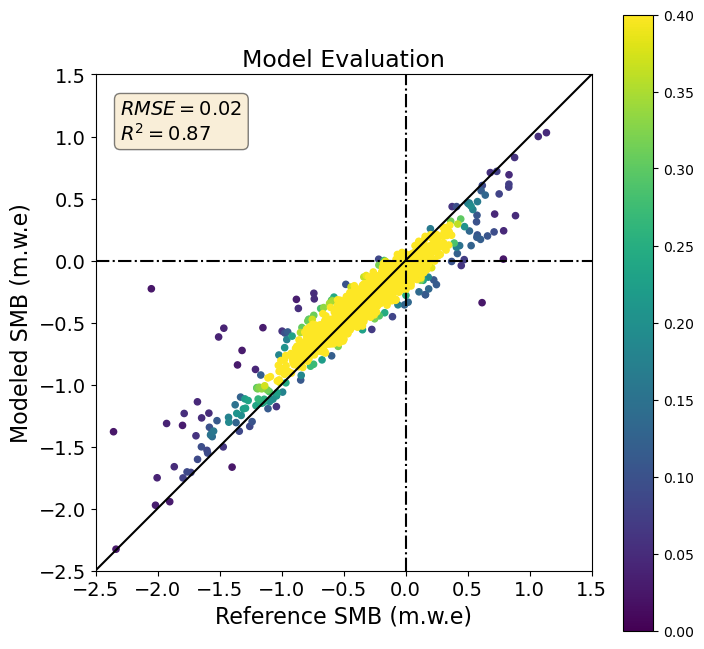

In [21]:
plot_prediction(y_train, reg_ensemble.predict(X_train), n_toplot=5000)

En este caso, los resultados por defecto no son tan malos, pero podrían mejorarse con una búsqueda de hiperparámetros.

Otro aspecto interesante de los métodos basados en árboles es su interpretabilidad. Es bastante fácil extraer la importancia de las características y la importancia por permutación, lo que puede darnos pistas importantes sobre la contribución de cada característica (y, por lo tanto, de las diferentes variables de forzamiento) para determinar el balance de masa a gran escala de los glaciares en Low Latitudes.

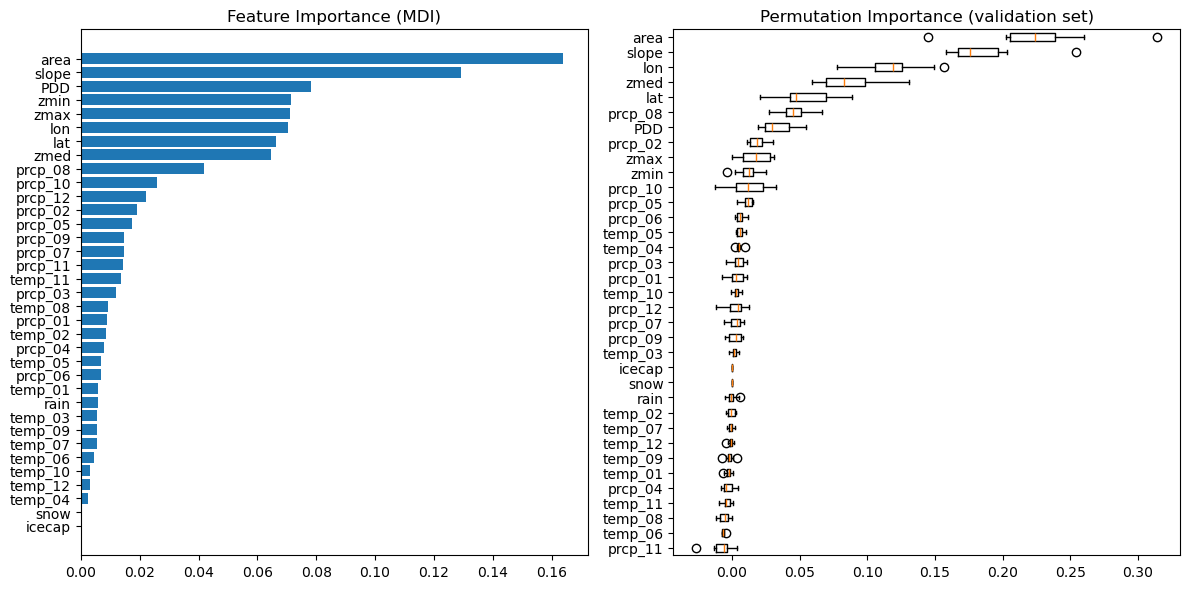

In [23]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_validation_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False)
plt.title("Permutation Importance (validation set)")
plt.yticks(np.arange(1, len(sorted_idx) + 1), np.array(df_validation_X.columns)[sorted_idx])
fig.tight_layout()
plt.show()


### 3.2.4. Red Neuronal

Las redes neuronales son algunos de los métodos de aprendizaje automático más poderosos disponibles. Sin embargo, son mucho más difíciles de calibrar debido a su gran cantidad de hiperparámetros, opciones de arquitectura y el hecho de que también tienen parámetros (pesos) que necesitan ser entrenados de manera iterativa utilizando descenso de gradiente.

En este caso, utilizaremos la más simple de las redes neuronales, un Perceptrón Multicapa clásico con una pequeña arquitectura de dos capas ocultas. Aún así, utilizaremos `sklearn` para esto, aunque para un modelado más serio, recomendamos encarecidamente usar bibliotecas más avanzadas y dedicadas como JAX, PyTorch o Keras/TensorFlow.

In [24]:
from sklearn.neural_network import MLPRegressor

Estos son algunos de los hiperparámetros que `sklearn` nos permite elegir para la red neuronal. Utilizamos una arquitectura pequeña de `(50,30,20,10)`, una función de activación `ReLu`, un optimizador LBFGS (generalmente mejor que ADAM para redes pequeñas), un tamaño de lote de 100, 200 épocas de entrenamiento, y barajamos los lotes para mejorar el aprendizaje.

Ten en cuenta que `sklearn` también nos permite elegir una fracción del conjunto de datos que se utilizará para la validación, lo que establece el paro temprano (es decir, detener el entrenamiento una vez que vemos que la pérdida ya no disminuye durante un número determinado de épocas).

In [25]:
reg_nn = MLPRegressor(hidden_layer_sizes=(50,30,20,10),
                      activation='relu',
                      solver='lbfgs', 
                      batch_size=100, 
                      max_iter=200,
                      learning_rate='adaptive', 
                      shuffle=True, 
                      validation_fraction=0.1)

In [26]:
%%time
reg_nn.fit(X_train_scaled, y_train)

e:\Proyecto_2024\INAIGEM\volumen_laguna\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1.33 s
Wall time: 1.3 s


e:\Proyecto_2024\INAIGEM\volumen_laguna\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(batch_size=100, hidden_layer_sizes=(50, 30, 20, 10),
             learning_rate='adaptive', solver='lbfgs')

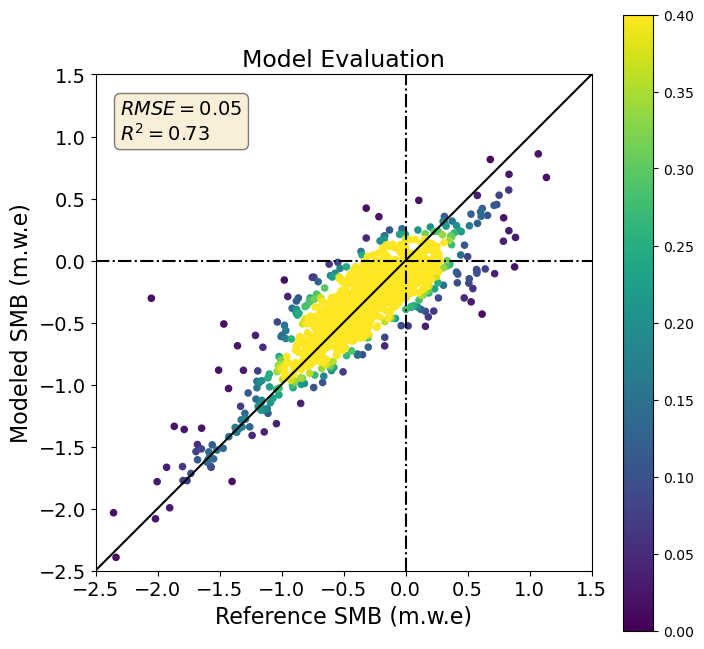

In [27]:
plot_prediction(y_train, reg_nn.predict(X_train_scaled), n_toplot=5000)

Al igual que con los métodos basados en árboles, podemos ver que esta red neuronal, incluso con una afinación menor de hiperparámetros, ya es bastante capaz de modelar la variabilidad del balance de masa de los glaciares para el conjunto de datos de entrenamiento. Ahora necesitamos asegurarnos de que también sea capaz de extrapolar correctamente a glaciares "no vistos" del conjunto de datos de prueba.

## [ **Exercice 2** ]
<img src="Figures/eye_logo.png" width="75"/>

Elige 2 o 3 modelos de aprendizaje automático diferentes y juega con los hiperparámetros para mejorar el rendimiento **en validación** observando el diagrama de dispersión. Solo necesitas reproducir el mismo flujo de trabajo, pero utilizando el conjunto de datos de validación para visualizar los resultados en lugar del de entrenamiento.

Esta es solo una forma aproximada de obtener una primera estimación de buenos hiperparámetros. En el próximo cuaderno, veremos cómo buscar correctamente los mejores hiperparámetros posibles utilizando validación cruzada.